In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [1]:
import os
preprocessor_obj_file_path=os.path.join('artifacts', 'preprocessor.pkl')
preprocessor_obj_file_path

'artifacts/preprocessor.pkl'

In [ ]:
import os

# Establece la variable de entorno GOOGLE_APPLICATION_CREDENTIALS
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'potent-shade-398114-0e5cee8898b5.json'


#Importacion de datos desde GS

In [ ]:
from google.cloud import bigquery
import pandas as pd

# Conecta con BigQuery
client = bigquery.Client()

# Realiza una consulta SQL para obtener los datos de la tabla específica en BigQuery
query = f"""
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2015
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2016
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2017
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2018
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2019
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2020
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2021
UNION ALL
SELECT id, amount, method, locality, region, suppliers, buyer, year, month, internal_type,budget
FROM {os.getenv('table_id')}.OCID_2022
"""

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
data = client.query(query).to_dataframe()
data

,id,amount,method,locality,region,suppliers,buyer,year,month,internal_type,budget
0,2111072,NaN,None,FRANCISCO DE ORELLANA,ORELLANA,None,CUERPO DE BOMBEROS DEL CANTON FCO DE ORELLANA,2022,10,None,NaN
1,2108260,NaN,None,CUENCA,AZUAY,None,EMPRESA PUBLICA DE MOVILIDAD TRANSITO Y TRANSP...,2022,10,None,NaN
2,2145986,NaN,None,ESMERALDAS,ESMERALDAS,None,SUBZONA ESMERALDAS,2022,12,None,NaN
3,2130821,NaN,None,QUITO,PICHINCHA,None,CONSEJO NACIONAL ELECTORAL,2022,11,None,NaN
4,1971401,NaN,None,SAMBORONDON,GUAYAS,None,GOBIERNO AUTONOMO DESCENTRALIZADO PARROQUIAL R...,2022,6,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
17465,1252715,4.504441,selective,SAN JACINTO DE YAGUACHI,GUAYAS,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,FAEALA21,2016,10,Catálogo electrónico - Mejor oferta,4.504441
17466,1252716,1.476300,selective,SAN JACINTO DE YAGUACHI,GUAYAS,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,FAEALA21,2016,10,Catálogo electrónico - Mejor oferta,1.476300
17467,1252717,1.258560,selective,SAN JACINTO DE YAGUACHI,GUAYAS,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,FAEALA21,2016,10,Catálogo electrónico - Mejor oferta,1.258560
17468,1252718,1.231200,selective,SAN JACINTO DE YAGUACHI,GUAYAS,COMPAÑIA GENERAL DE COMERCIO COGECOMSA S. A.,FAEALA21,2016,10,Catálogo electrónico - Mejor oferta,1.231200


In [ ]:
data.isnull().sum()

id                  0
amount             88
method             78
locality          231
region            231
suppliers         572
buyer               0
year                0
month               0
internal_type      78
budget           1158
dtype: int64

In [ ]:
df = data.copy()
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum()

(15830, 11)


id               0
amount           0
method           0
locality         0
region           0
suppliers        0
buyer            0
year             0
month            0
internal_type    0
budget           0
dtype: int64

# Tablas:
- Estadisticos por internal type

In [ ]:
import pandas as pd
# Supongamos que 'df' es tu DataFrame
categories = df['internal_type'].unique()

# Crea una lista para almacenar los diccionarios de estadísticas
statistics_list = []

# Calcula estadísticas para cada categoría y agrégalas a la lista
for category in categories:
    category_df = df[df['internal_type'] == category]
    statistics = {
        'Category': category,
        'Mean': category_df['amount'].mean(),
        'Median': category_df['amount'].median(),
        'Std Dev': category_df['amount'].std(),
        'Min': category_df['amount'].min(),
        'Max': category_df['amount'].max(),
    }
    statistics_list.append(statistics)

# Convierte la lista en un DataFrame
statistics_df = pd.DataFrame(statistics_list)

# Muestra el DataFrame resultante con las estadísticas
statistics_df.sort_values('Mean', ascending=False)


,Category,Mean,Median,Std Dev,Min,Max
18,Contrataciones con empresas públicas internaci...,1.178432e+07,1.178432e+07,NaN,1.178432e+07,1.178432e+07
9,Licitación,2.075044e+06,1.603010e+06,1.808090e+06,5.888271e+05,9.157797e+06
19,Concurso publico,1.316312e+06,7.382304e+05,1.870078e+06,3.900000e+05,8.379798e+06
17,Comunicación Social – Proceso de Selección,7.565914e+05,1.190674e+05,1.791560e+06,7.000000e+03,7.000000e+06
8,Cotización,2.853964e+05,2.474704e+05,1.963408e+05,4.550000e+04,9.972831e+05
4,Catálogo electrónico - Gran compra puja,2.228394e+05,6.071520e+04,5.598723e+05,1.232000e+03,2.352148e+06
22,Concurso Público por Lista Corta Desierta,1.732536e+05,1.732536e+05,1.587505e+05,6.100000e+04,2.855072e+05
10,Lista corta,1.644691e+05,1.336480e+05,1.037351e+05,5.993520e+04,5.217500e+05
7,Contratos entre Entidades Públicas o sus subsi...,1.312199e+05,1.793513e+04,4.389973e+05,2.197700e+02,4.475834e+06
13,Bienes y Servicios únicos,1.127488e+05,2.000000e+04,3.849079e+05,1.754400e+02,4.138325e+06


# Visualizaciones

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame y 'amount' es la columna que deseas visualizar
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='amount', fill=True, common_norm=False)
plt.title("Distribución de la columna 'amount'")
plt.xlabel("amount")
plt.ylabel("Densidad")
plt.show()


<ipython-input-11-b4dc16050ffa>:26: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data, ax=axes[i], fill=True)  # Utiliza fill en lugar de shade


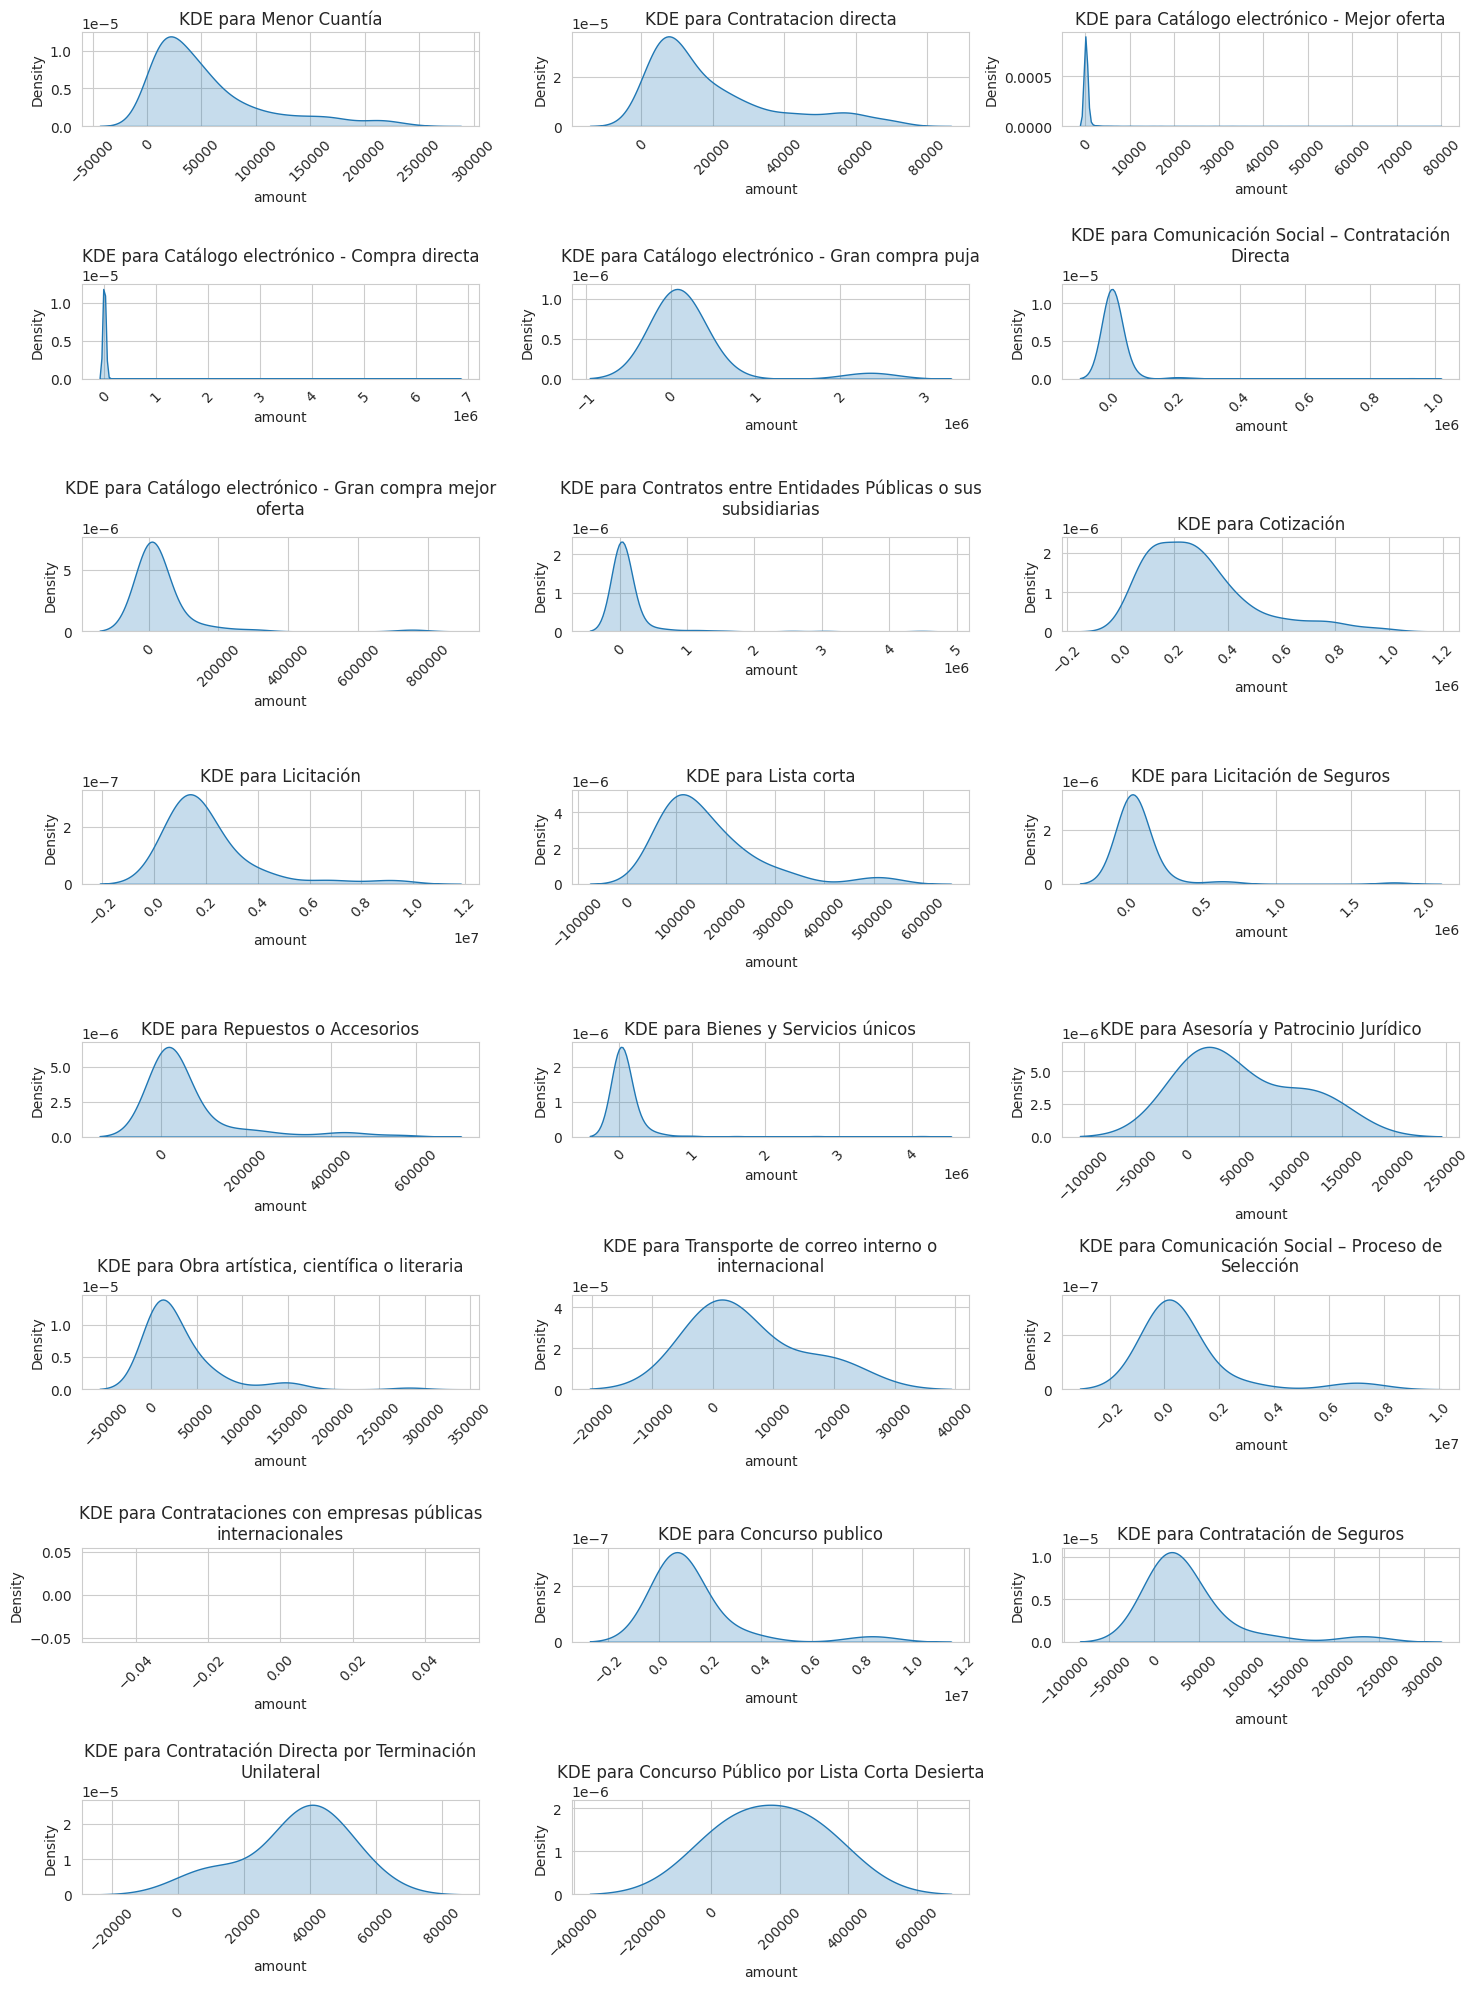

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap  # Importa la función wrap para dividir el título en varias líneas

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'amount' y 'internal_type'

# Crear una lista de las categorías únicas en 'internal_type'
categories = df['internal_type'].unique()

# Definir el número de filas y columnas para los subplots
n_rows = 8
n_cols = 3

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20), sharex=False)
axes = axes.ravel()  # Convertir el arreglo de ejes en un arreglo unidimensional

# Iterar a través de las categorías y crear un gráfico KDE para cada una
for i, category in enumerate(categories):
    # Seleccionar los datos para la categoría actual
    data = df[df['internal_type'] == category]['amount']

    # Crear un gráfico KDE en el subplot correspondiente
    sns.kdeplot(data, ax=axes[i], fill=True)  # Utiliza fill en lugar de shade

    # Rotar los ticks del eje X
    axes[i].tick_params(axis='x', labelrotation=45)  # Puedes ajustar el ángulo de rotación

    # Divide el título en varias líneas si es demasiado largo
    tituloKDE = '\n'.join(textwrap.wrap(f'KDE para {category}', width=50))

    # Agregar título al subplot
    axes[i].set_title(tituloKDE)

    # Opcionalmente, puedes ajustar los límites de los ejes x e y si es necesario
    # axes[i].set_xlim(min_value, max_value)  # Establece límites en el eje x
    # axes[i].set_ylim(0, y_max_value)  # Establece límites en el eje y

# Eliminar ejes vacíos si el número de categorías es menor que el número de subplots
for i in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[i])

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


<ipython-input-43-bf3e47a1e6fc>:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.4, 0.03, 1, 0.95])  # Ajusta la parte superior para el título


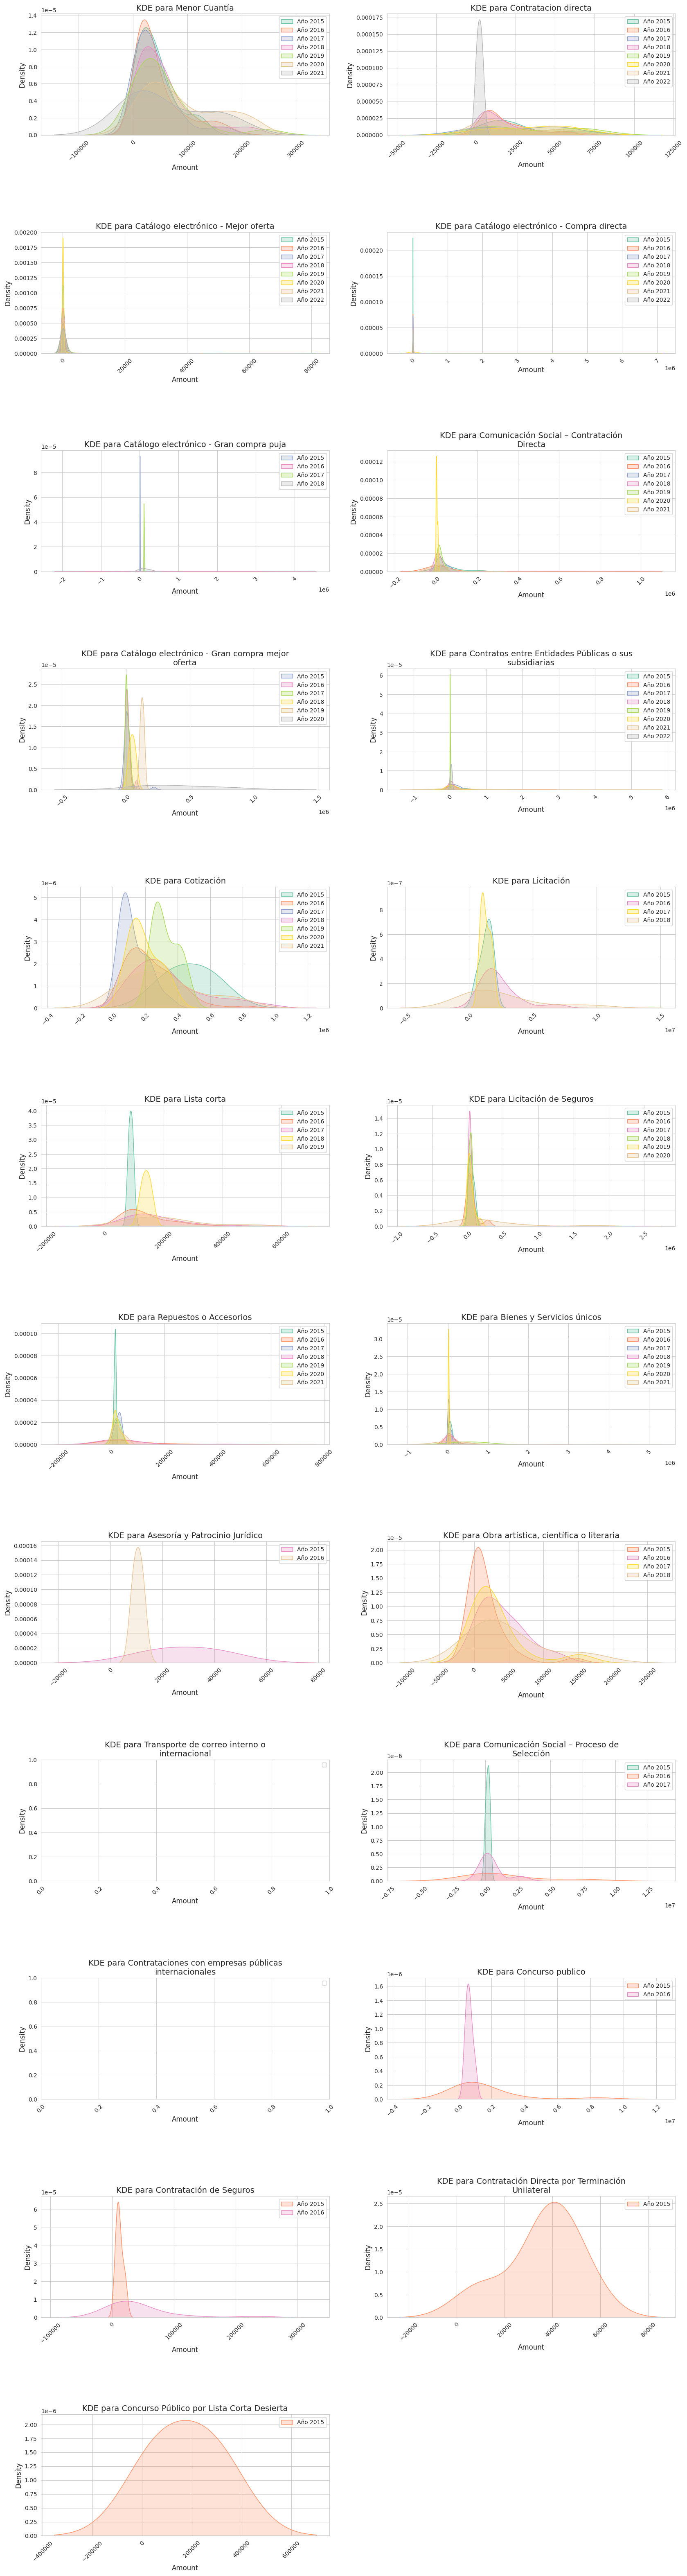

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'amount', 'internal_type', y 'year'

# Crear una lista de las categorías únicas en 'internal_type'
categories = df['internal_type'].unique()

# Definir el número de filas y columnas para los subplots
n_rows = 12
n_cols = 2

# Establecer una paleta de colores personalizada para los años
year_colors = sns.color_palette("Set2", len(df['year'].unique()))

# Cambiar el estilo de Seaborn
sns.set_style("whitegrid")

# Aumentar el tamaño vertical de cada subplot al doble
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 80), sharex=False, gridspec_kw={'hspace': 0.8})

axes = axes.ravel()  # Convertir el arreglo de ejes en un arreglo unidimensional

# Iterar a través de las categorías y crear un gráfico KDE para cada una
for i, category in enumerate(categories):
    # Crear una lista de etiquetas de leyenda ordenadas por año
    legend_labels = []
    years = df['year'].unique()
    years = [int(year) for year in years]  # Convertir años en enteros para ordenar correctamente
    years.sort()  # Ordenar los años de manera ascendente
    for year in years:
        # Seleccionar los datos para la categoría actual y el año actual
        data = df[(df['internal_type'] == category) & (df['year'] == year)]['amount']

        # Crear un gráfico KDE con un color diferente para cada año
        sns.kdeplot(data, ax=axes[i], label=f'Año {year}', color=year_colors[year - years[0]], fill=True, warn_singular=False)

        # Agregar el año a la lista de etiquetas de leyenda
        legend_labels.append(f'Año {year}')

    # Rotar los ticks del eje X
    axes[i].tick_params(axis='x', labelrotation=45)

    # Divide el título en varias líneas si es demasiado largo
    tituloKDE = '\n'.join(textwrap.wrap(f'KDE para {category}', width=50))

    # Agregar título al subplot y aumentar el tamaño de fuente
    axes[i].set_title(tituloKDE, fontsize=14)

    # Agregar etiquetas a los ejes X e Y
    axes[i].set_xlabel('Amount', fontsize=12)
    axes[i].set_ylabel('Density', fontsize=12)

    # Agregar leyenda para los años en la parte superior
    axes[i].legend(legend_labels, loc='upper right', fontsize=10)

    # Opcionalmente, puedes ajustar los límites de los ejes x e y si es necesario
    # axes[i].set_xlim(min_value, max_value)  # Establece límites en el eje x
    # axes[i].set_ylim(0, y_max_value)  # Establece límites en el eje y

# Eliminar ejes vacíos si el número de categorías es menor que el número de subplots
for i in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[i])

# Ajustar el espaciado entre los subplots verticalmente para hacerlos más altos
plt.tight_layout(rect=[0.4, 0.03, 1, 0.95])  # Ajusta la parte superior para el título

# Mostrar los gráficos
plt.show()


BoxPlot:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame
categories = df['internal_type'].unique()

# Configura la cuadrícula de subgráficos con ejes independientes
g = sns.FacetGrid(df, col='internal_type', col_wrap=3, sharey=False, height=5)

# Crea los boxplots para cada categoría en la cuadrícula
g.map_dataframe(sns.boxplot, x='internal_type', y='amount', palette='viridis')

# Ajusta las etiquetas y títulos
g.set_axis_labels("", "Amount")
g.set_titles("Boxplot de 'amount' para {col_name}")

# Ajusta la disposición de los subgráficos
plt.tight_layout()

# Muestra el gráfico
plt.show()


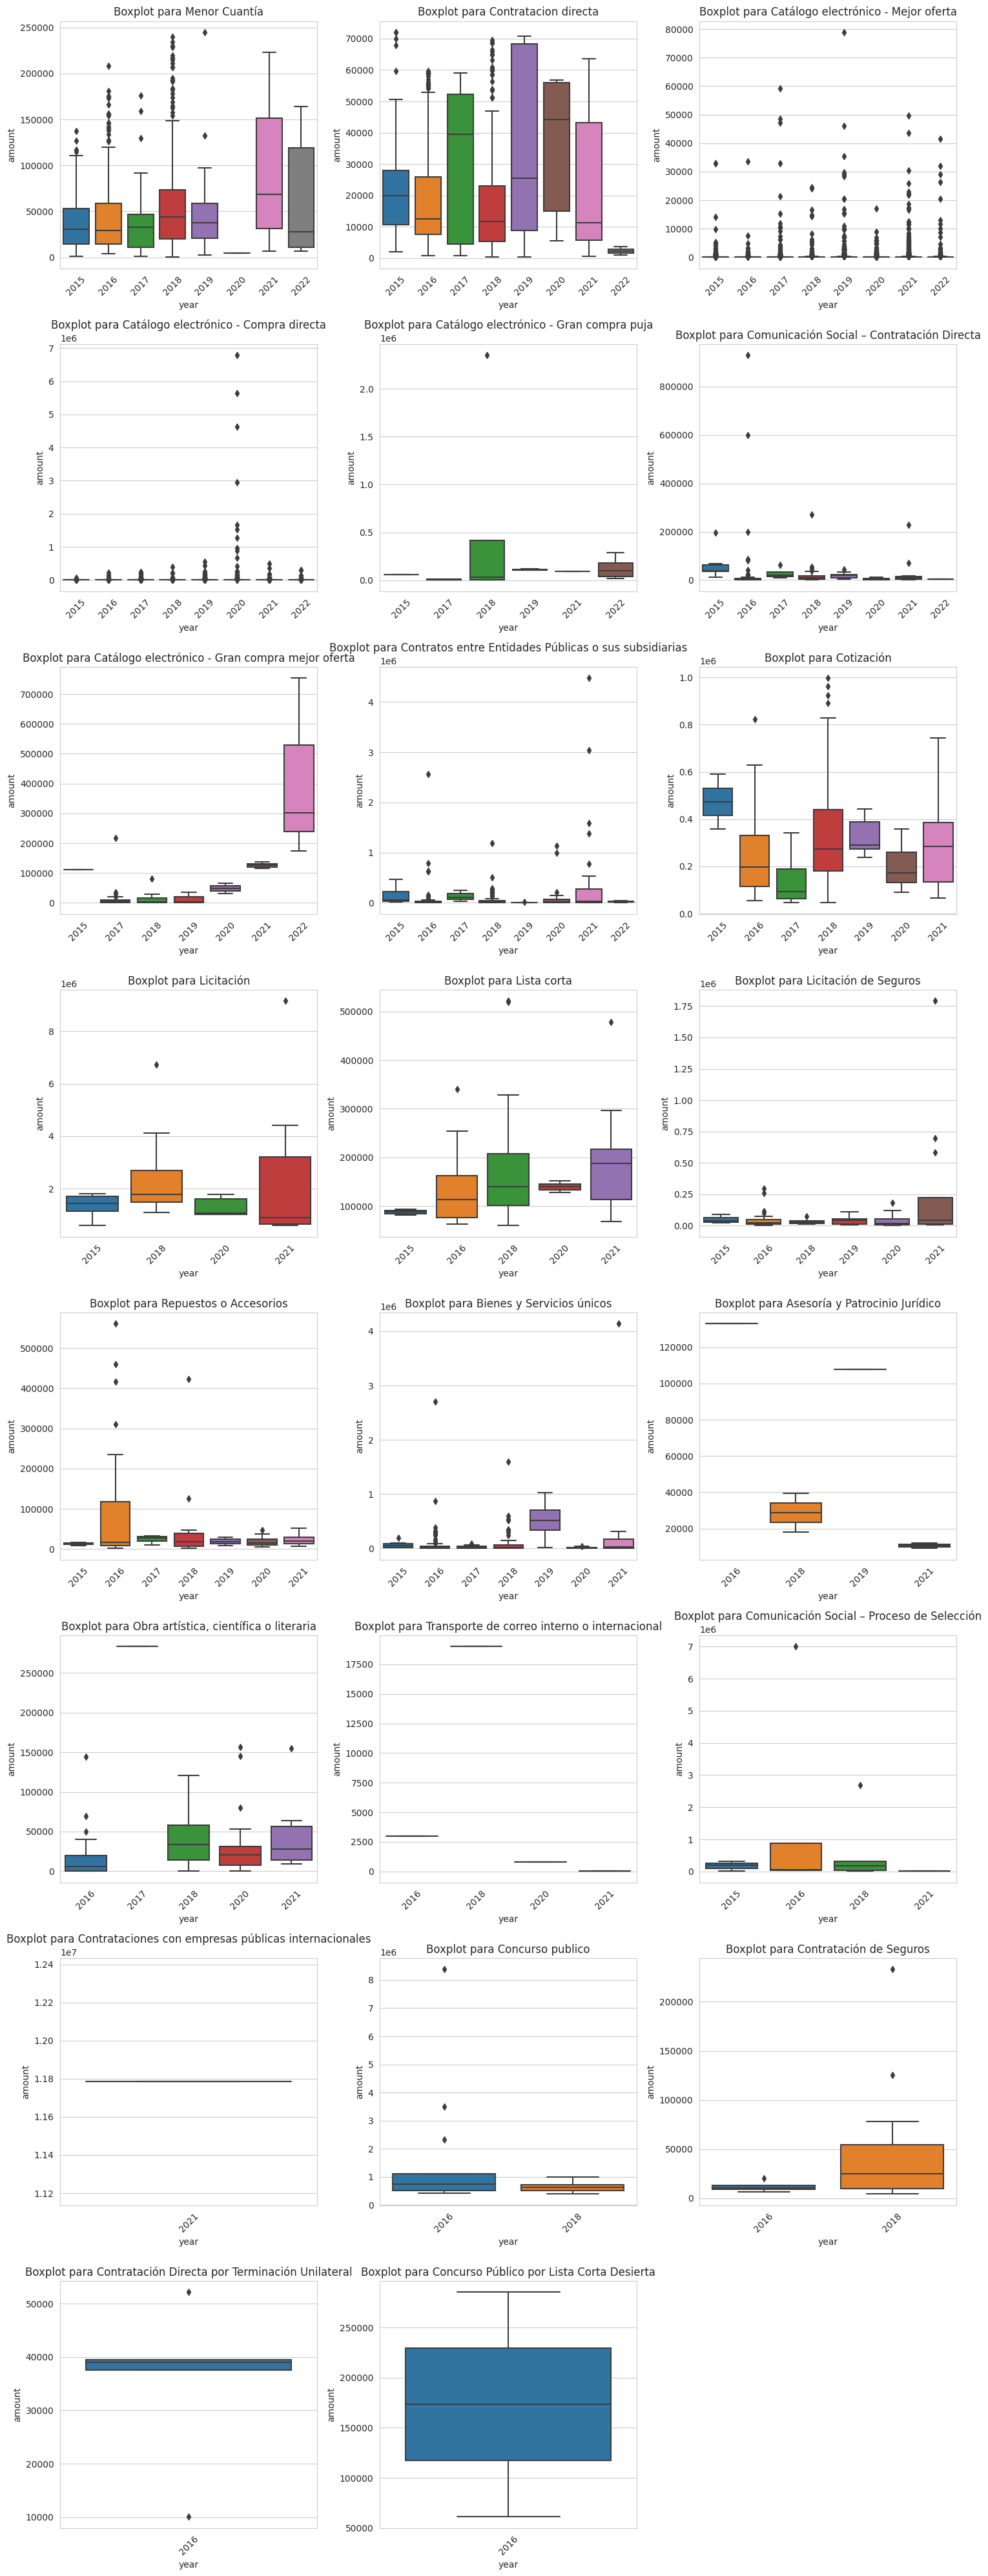

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'amount', 'internal_type', y 'year'

# Crear una lista de las categorías únicas en 'internal_type'
categories = df['internal_type'].unique()

# Definir el número de filas y columnas para los subplots
n_rows = 8
n_cols = 3

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 40), sharex=False)
axes = axes.ravel()  # Convertir el arreglo de ejes en un arreglo unidimensional

# Iterar a través de las categorías y crear un gráfico de caja para cada una
for i, category in enumerate(categories):
    # Filtrar los datos para la categoría actual
    data_category = df[df['internal_type'] == category]

    if not data_category.empty:  # Verificar si hay datos para la categoría actual
        # Crear un gráfico de caja en el subplot correspondiente
        sns.boxplot(x='year', y='amount', data=data_category, ax=axes[i])

        # Rotar los ticks del eje X
        axes[i].tick_params(axis='x', labelrotation=45)

        # Agregar título al subplot
        axes[i].set_title(f'Boxplot para {category}')

    # Opcionalmente, puedes ajustar los límites de los ejes y si es necesario
    # axes[i].set_ylim(min_value, max_value)  # Establece límites en el eje y

# Eliminar ejes vacíos si el número de categorías es menor que el número de subplots
for i in range(len(categories), n_rows * n_cols):
    fig.delaxes(axes[i])

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


# Preprocesamiento de datos

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle

In [ ]:
!rm -rf model*

In [ ]:
df.isnull().sum()

id               0
amount           0
method           0
locality         0
region           0
suppliers        0
buyer            0
year             0
month            0
internal_type    0
budget           0
dtype: int64

In [ ]:

# Crea una columna de tiempo
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas
df['locality_ec'] = label_encoder.fit_transform(df['locality'])
df['region_ec'] = label_encoder.fit_transform(df['region'])


# Crear una instancia del StandardScaler
scaler = StandardScaler()
# Ajustar el scaler a los datos y transformar la columna 'amount'
df['amount_normalized'] = scaler.fit_transform(df[['amount']])
df['budget_normalized'] = scaler.fit_transform(df[['budget']])

In [ ]:
print(df.isnull().sum())
df.head(2)

id                   0
amount               0
method               0
locality             0
region               0
suppliers            0
buyer                0
year                 0
month                0
internal_type        0
budget               0
date                 0
locality_ec          0
region_ec            0
amount_normalized    0
budget_normalized    0
dtype: int64


,id,amount,method,locality,region,suppliers,buyer,year,month,internal_type,budget,date,locality_ec,region_ec,amount_normalized,budget_normalized
123,1902478,24000.0000,selective,GUAYAQUIL,GUAYAS,DISTRIBUIDORA CESAR BORJA DISTRIBORJA S.A.,DIRECCION DISTRITAL 09D08 PASCUALES 2 SALUD,2022,3,Menor Cuantía,24000.0000,2022-03-01,74,9,0.000517,-0.003917
131,1861329,31442.8508,selective,ELOY ALFARO,ESMERALDAS,GUERRERO RODRIGUEZ DIOKLER MANUEL,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PARROQ...,2022,1,Menor Cuantía,31442.8508,2022-01-01,57,7,0.034067,0.028312


# Creacion del Modelo

In [ ]:
df[['id','amount','budget','locality_ec','region_ec','year','month']].dtypes

id               Int64
amount         float64
budget         float64
locality_ec      int64
region_ec        int64
year             Int64
month            Int64
dtype: object

In [ ]:
import joblib  # Importa la biblioteca joblib

In [ ]:
valores_unicos = df['internal_type'].unique()
# valores_unicos=['Licitación']

variables = ['amount', 'locality_ec', 'region_ec', 'year', 'month']

# Crea un modelo IsolationForest para todo el DataFrame df
iforest = IsolationForest(n_estimators=100, max_samples="auto", contamination=0.01)


# Agrega la columna 'is_anomaly_prediction' al DataFrame principal df con valores iniciales 'NORMAL'
df['is_anomaly_prediction'] = 'VALORES Null'

# Itera a través de los valores únicos y actualiza 'is_anomaly_prediction' para cada valor único
for tipo in valores_unicos:
  try:
      # print(f'Si se pudo {tipo}')
      X = df[df['internal_type'] == tipo]

      iforest_fit = iforest.fit(X[variables])
      predictions = iforest_fit.predict(X[variables])

      # Calcula las predicciones de anomalías para el subconjunto X
      X_predictions = iforest_fit.predict(X[variables].dropna())

      # Guarda el modelo en un archivo con nombre específico para cada tipo
      filename = f'model_{tipo}.pkl'
      joblib.dump(iforest_fit, filename)

      # Actualiza 'is_anomaly_prediction' para el subconjunto X
      df.loc[X.index, 'is_anomaly_prediction'] = ['ANOMALIAS' if pred == -1 else 'NORMAL' for pred in X_predictions]
  except:
       print(f'No se pudo {tipo}')

In [ ]:
import pandas as pd

data = {
    'amount': [200, 150, 300, 1000],
    'budget': [250, 200, 350, 1200],
    'locality_ec': [2, 1, 3, 4],
    'region_ec': [102, 101, 103, 104],
    'year': [2023, 2023, 2023, 2023],
    'month': [2, 2, 2, 2]
}

df_prueba = pd.DataFrame(data)

# Itera a través de los valores únicos y carga el modelo correspondiente
for tipo in valores_unicos:
    # Carga el modelo desde el archivo
    filename = f'model_{tipo}.pkl'
    iforest_fit = joblib.load(filename)

    # Hace predicciones en el DataFrame de prueba
    predictions = iforest_fit.predict(df_prueba[variables])

    # Agrega las predicciones al DataFrame de prueba
    df_prueba[f'{tipo}_is_anomaly_prediction'] = ['ANOMALIAS' if pred == -1 else 'NORMAL' for pred in predictions]



In [ ]:
# Muestra el DataFrame de prueba con las predicciones
df_prueba

In [73]:
import pandas as pd
import plotly.express as px

X=df[df['internal_type']=='Cotización']

# Crea el gráfico de dispersión con Plotly
fig = px.scatter(X, x='date', y='amount', color='is_anomaly_prediction', hover_data=['suppliers', 'buyer', 'region'])

# Personaliza el gráfico
fig.update_traces(marker=dict(size=8))

# Añade etiquetas a los ejes
fig.update_layout(
    title='Gráfico de Dispersión de Tiempo',
    xaxis_title='Fecha',
    yaxis_title='Monto'
)

# Mostrar el gráfico interactivo
fig.show()


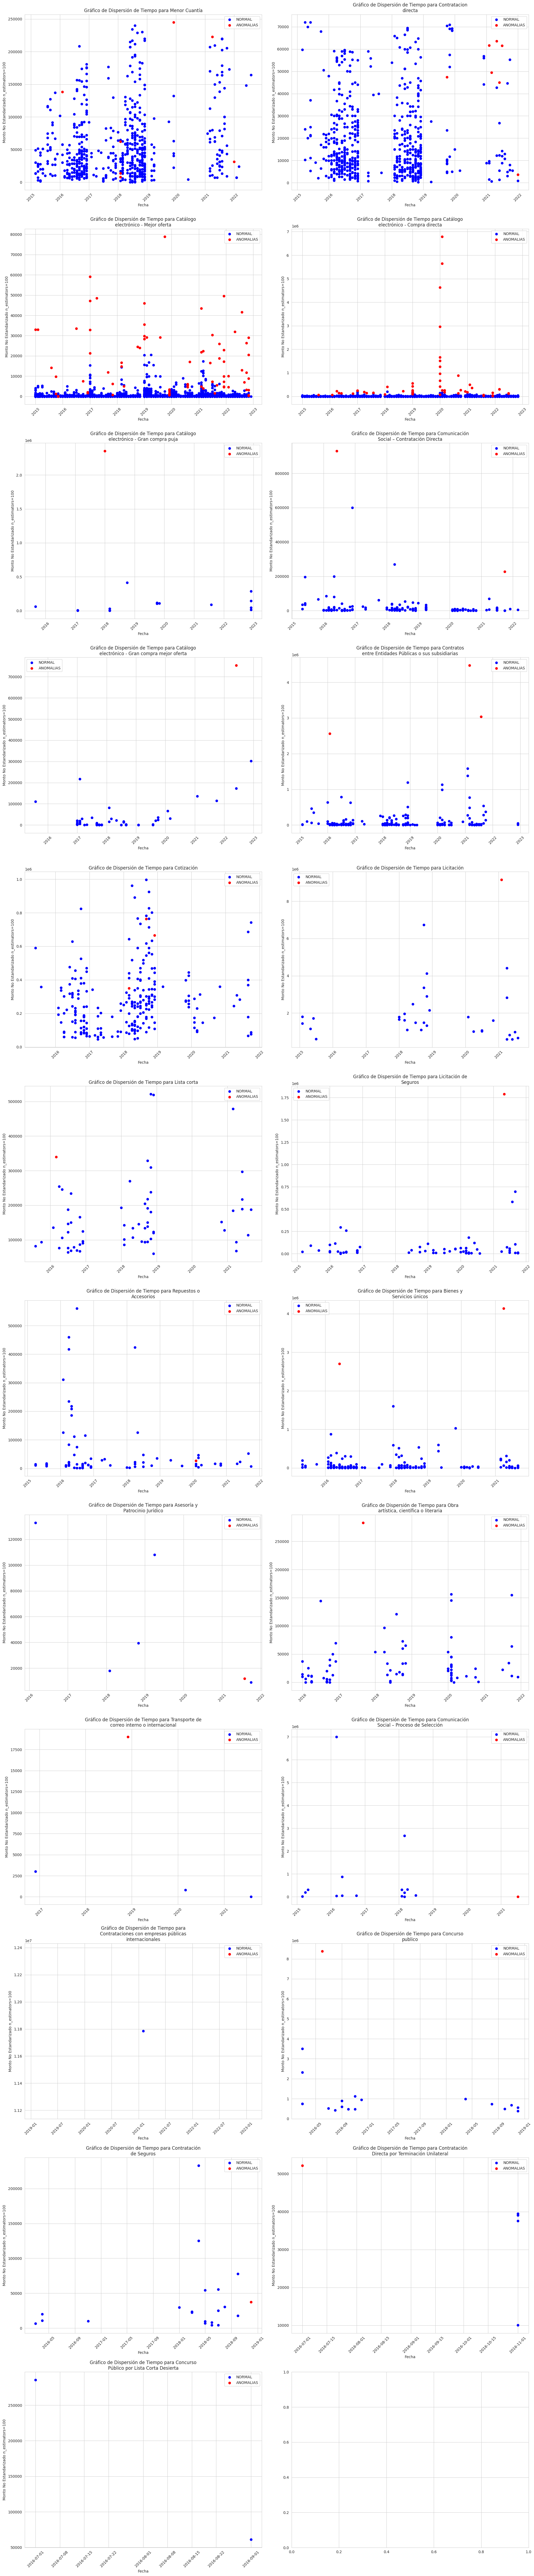

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap  # Importa la función wrap para dividir el título en varias líneas

valores_unicos = df['internal_type'].unique()

# Configura la disposición del grid
num_filas = 12
num_columnas = 2

# Calcula el número total de subplots requeridos
num_subplots = num_filas * num_columnas

# Asegura que el número total de subplots sea igual o mayor que la cantidad de tipos únicos
if num_subplots < len(valores_unicos):
    raise ValueError("El número total de subplots es menor que la cantidad de tipos únicos. Ajusta el número de filas y columnas.")

# Ajusta el tamaño de los subplots (ancho x alto)
ancho_subplot = 10
alto_subplot = 8

# Crea el grid de subplots y ajusta las dimensiones del gráfico
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(ancho_subplot * num_columnas, alto_subplot * num_filas))

for i, item in enumerate(valores_unicos):
    if i >= num_subplots:
        break  # Evita crear más subplots de los necesarios

    X = df[df['internal_type'] == item]

    # Divide el grid en filas y columnas
    fila = i // num_columnas
    columna = i % num_columnas
    ax = axs[fila, columna]

    # Divide el título en varias líneas si es demasiado largo
    titulo = '\n'.join(textwrap.wrap(f'Gráfico de Dispersión de Tiempo para {item}', width=50))

    # Crea el gráfico de dispersión en el subplot correspondiente
    ax.scatter(X[X['is_anomaly_prediction'] == 'NORMAL']['date'], X[X['is_anomaly_prediction'] == 'NORMAL']['amount'], label='NORMAL', color='blue')
    ax.scatter(X[X['is_anomaly_prediction'] == 'ANOMALIAS']['date'], X[X['is_anomaly_prediction'] == 'ANOMALIAS']['amount'], label='ANOMALIAS', color='red')

    # Personaliza el gráfico con el título dividido
    ax.set_title(titulo)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Monto No Estandarizado n_estimators=100')
    ax.legend()
    ax.grid(True)

    # Rota los ticks del eje X
    plt.setp(ax.get_xticklabels(), rotation=45)

# Ajusta el espacio entre subplots
plt.tight_layout()

# Mostrar el grid de gráficos
plt.show()
